<a href="https://colab.research.google.com/github/yusptar/PCVK/blob/main/PCVK_Modul-7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 145. ... 177.   0.   0.]
 ...
 [  0.   0.  11. ...   4.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


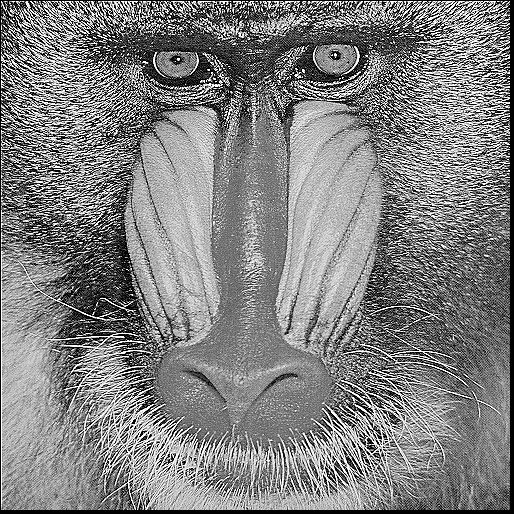

In [15]:
image = cv.imread('/content/drive/MyDrive/mandrill.tiff')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

def convolution2d(image, kernel, padding, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

# Sharpen
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

image_sharpen = convolution2d(image, kernel, padding=2)
cv2_imshow(image_sharpen)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 145. ... 177.   0.   0.]
 ...
 [  0.   0.  11. ...   4.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


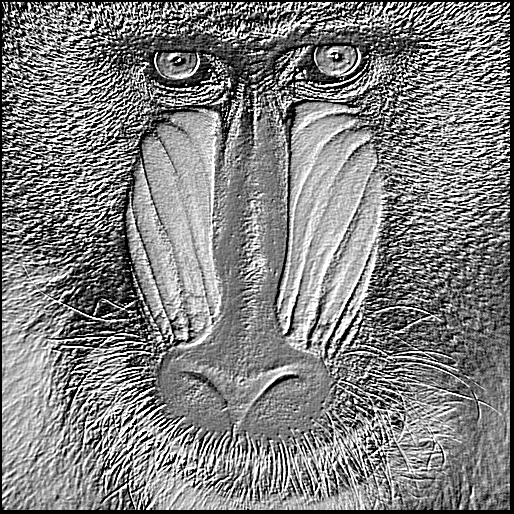

In [22]:
# Emboss
kernel = np.array([[-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]])
image_emboss = convolution2d(image, kernel, padding=2)
cv2_imshow(image_emboss)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 145. ... 177.   0.   0.]
 ...
 [  0.   0.  11. ...   4.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


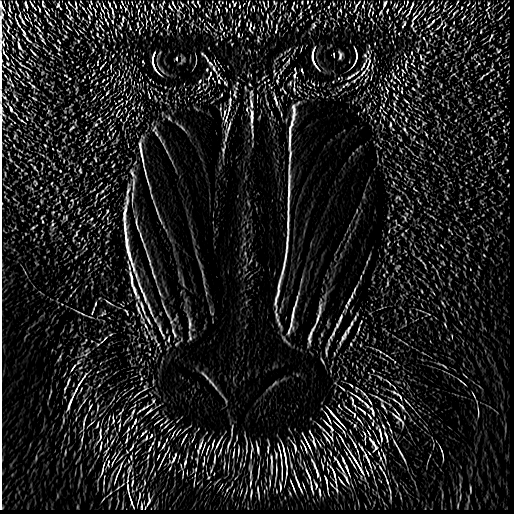

In [23]:
# Left Sobel Edge Detection
kernel = np.array([[1, 0, -1],
                   [2, 0,-2],
                   [1, 0, -1]])
image_lft_sobel = convolution2d(image, kernel, padding=2)
cv2_imshow(image_lft_sobel)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 145. ... 177.   0.   0.]
 ...
 [  0.   0.  11. ...   4.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


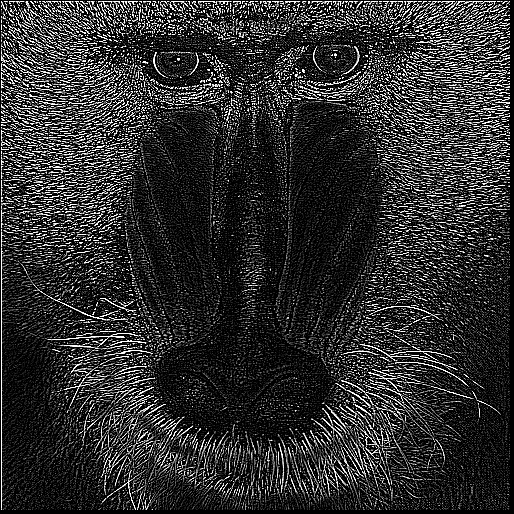

In [24]:
# Canny Edge Detection 
kernel = np.array([[-1, -1, -1],
                   [-1, 8,-1],
                   [-1, -1, -1]])
image_cny_edge = convolution2d(image, kernel, padding=2)
cv2_imshow(image_cny_edge)

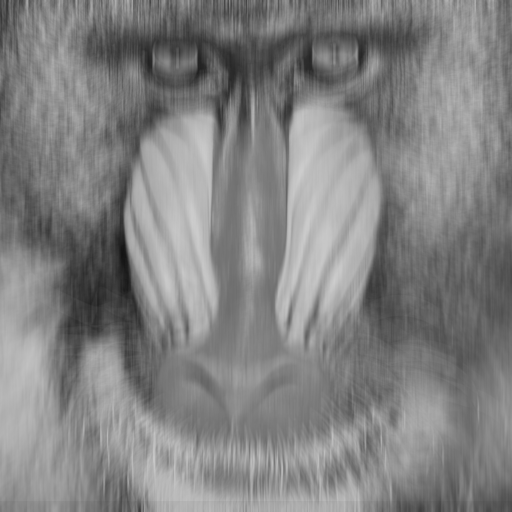

In [25]:
# 21 x 21 Gaussian Blur
sigma=math.sqrt(441)
gaussian_kernel = cv.getGaussianKernel(21, sigma)
gauss_kernel = gaussian_kernel 
gaussian_kernel.transpose()
image_gaussian = cv.filter2D(src=image, ddepth=-1, kernel=gauss_kernel)

cv2_imshow(image_gaussian)